## Overview

Contrary to the logistic growth process, these stochastic processes are **competition models**. In particular, as in the logistic growth process, the models can be described *starting from a set of sites that we think of as spatial locations and
the dynamics is dictated by global interactions*. Rather than being either empty or occupied, **these sites are now occupied by one of two possible types of individuals that we call type 0 and type 1.**

Wright-Fisher and Moran models were originally introduced in the context of *population genetics to understand the evolution of the gene frequency in a constant size population of haploid individuals*, but can be seen as the simplest spatially implicit **competition models** in the same way the logistic growth process can be seen as the simplest spatially implicit **invasion model**.

## Binomial distribution

The Wright–Fisher model describes populations with *nonoverlapping generations* that evolve in discrete time according to the following simple rules.

- The parent of each individual at each generation is chosen independently and uniformly at random from the population at the previous generation.

- Each individual is of the same type as its parent.

The process itself is the discrete-time Markov chain $\left(X_{n}\right)$ that keeps track of the number of type 1 individuals at generation $n .$ In view of the evolution rules, each individual at each generation is independently of type 1 with probability the fraction of type 1 individuals at the previous generation, which gives the following transition
probabilities that are binomial:
$$
p(x, y)=\left(\begin{array}{l}{N} \\ {y}\end{array}\right) p^{y}(1-p)^{N-y} \quad \text { where } \quad p=x / N
$$
where $x$ is number of type-1 individual from last generation, and $y$ is number of type-1 at current generation. The equation above indicates that $y$ is solely dependent on the information from previous generation. In plain words, if we want to have $y$ type-1 individuals, we first choose $y$ sites out of $N$ to occupy, and for these $y$ individuals being type 1, we need all of them as offsprings of type 1 individuals from last generation. The propability for that is $p^y$. The rest of $N$ sites are occupied by type 0 individuals, and the probability for that is $(1-p)^{N-y}$.

**Moran model** describes similar dynamics but at a slower time scale: there is only **one birth at each time step so that generations now overlap**. More precisely, the process again keeps track of the number of type 1 individuals at time $n$ but the population now evolves according to the following rules:

- At each time step, one individual chosen uniformly at random is replaced by the offspring of an individual chosen uniformly at random from the population at the previous time step.

- Each individual is again of the same type as its parent.

The rules gives the transition probabilities as:
$$
p(x, x \pm 1)=\left(\frac{x}{N}\right)\left(1-\frac{x}{N}\right) \quad \text { and } \quad p(x, x)=\left(\frac{x}{N}\right)^{2}+\left(1-\frac{x}{N}\right)^{2}
$$
for all $x=0,1, \ldots, N .$

The first equation says that we change the population of type 1 or 0 by choosing a parent and replacing an individual of different kind (i.e., 1 to 0 or 0 to 1).

This implies that the Moran model is a **martingale**. We can prove that, *starting with $x$ type 1 individuals, this type eventually wins with probability the initial fraction $x / N$ of type 1 individuals.* This is the same for Wright-Fisher model.

### Algorithm for the Wright-Fisher/Moran model
- For each site, say $i,$ choose a site uniformly at random, say $j$ 
- Fix the type of the individual at site $i$ at generation $n+1$ to be the same as the type of the individual at site $j$ at generation $n .$

The algorithm for the Moran model is similar except that, instead of updating all the sites at once, we only *choose one pair of sites (i, j) uniformly at random at each time step*.

## Probability of fixation
There are two absorbing states for each type: 0 and N. All the other states are therefore transient. In particular, *the system converges almost surely to one of its two absorbing states and the first natural question about the processes is: Who wins?* Here we use the **optional stopping theorem** to answer the question.

### Theorem for type-1 win
Starting with $X_{0}=x$ individuals of type 1
$$
P_{x}(\text { type } 1 \text { wins })=P_{x}\left(X_{n}=N \text { for some } n\right)=x / N
$$
**Proof**:The transition probabilities are given by 
$$
p(x, y)=P(\text { Binomial }(N, x / N)=y) \quad \text { for all } \quad x, y=0,1, \ldots, N
$$
from which it follows that, for all $x$,
$$
E\left(X_{n+1} | X_{n}=x\right)=\Sigma_{y} y p(x, y)=E(\text { Binomial }(N, x / N))=x
$$
**This shows that $\left(X_{n}\right)$ is a martingale.** Now, let $p_{0}$ and $p_{N}$ be, respectively, the probability of fixation to all type 0 and all type $1,$ and consider the time to fixation
$$
T=\inf \left\{t: X_{t} \in\{0, N\}\right\}
$$
At each time step, the probability the process jumps to one of its two absorbing states is at least $p(\lfloor N / 2\rfloor, 0),$ which is strictly positive. In particular,
$$
P(T=\infty) \leq P(\text { Geometric }(p(\lfloor N / 2\rfloor, 0))=\infty)=0
$$
so time $T$ is almost surely finite. since in addition $\left(X_{n}\right)$ is bounded, the optional stopping theorem applies, and we get
$$
x=E_{x}\left(X_{0}\right)=E_{x}\left(X_{T}\right)=N \times P\left(X_{T}=N\right)+0 \times P\left(X_{T}=0\right)=N p_{N}
$$
showing that, starting with $x$ type 1 individuals, $p_{N}=x / N$
**An intuition for the proof above is:** *after a long time, all the individuals must have descended from just one of the individuals present at generation zero* and the probability that this common ancestor was of type 1 is equal to the relative frequency $x / N$ of type 1 at generation zero.

## Diffusion approximation and time to absorption
**How long does it take for the population to fixate?(i.e., for either type 1 or type 0 to win?)**

**The diffusion approximation of a discrete-time Markov chain is obtained by rescaling the state space by its size and
speeding up time by the same factor.**

Recalling that N denotes the population size, the diffusion approximation of the Wright–Fisher model is thus defined as 
$$
Y_{t}=\lim _{N \rightarrow \infty} N^{-1} X_{\lfloor N\cdot t\rfloor} \quad \text { where } \quad\lfloor N t\rfloor=\text { integer part of } N\cdot t
$$
The state space of this process is $|$ the unit interval $[0,1],$ which represents the frequency, rather than the number, of type 1 individuals. It can be proved that diffusion processes are fully characterized by the two quantities
$$
\begin{array}{ll}{\text { drift parameter }} & {\mu(x)=\lim _{\varepsilon \downarrow 0} \varepsilon^{-1} E\left(Y_{t+\varepsilon}-Y_{t} | Y_{t}=x\right)} \\ {\text { diffusion parameter }} & {\sigma^{2}(x)=\lim _{\varepsilon \downarrow 0} \varepsilon^{-1} E\left(\left(Y_{t+\varepsilon}-Y_{t}\right)^{2} | Y_{t}=x\right)}\end{array}
$$
while, for all $n \geq 3,$ we have
$$
\lim _{\varepsilon \downarrow 0} \varepsilon^{-1} E\left(\left(Y_{t+\varepsilon}-Y_{t}\right)^{n} | Y_{t}=x\right)=0
$$
To study the time it takes for the population to fixate, we let
$$
T=\inf \left\{t: Y_{t} \in\{0,1\}\right\} \quad \text { and } \quad u(x)=E\left(T | Y_{0}=x\right)
$$
be the time to absorption and its expected value starting from frequency x. Then, the function u thus defined satisfies the following differential equation:

### Theorem for dift and diffusion parameters
$$
\begin{array}{l}{\text { For all } x \in[0,1], \text { we have }} \\ {\qquad \mu(x) u^{\prime}(x)+(1 / 2) \sigma^{2}(x) u^{\prime \prime}(x)=-1}\end{array}
$$

In the special case of the Wright–Fisher model, the drift parameter and diffusion parameter are given by:
$$
\mu(x)=0 \text { because }\left(X_{n}\right) \text { is a martingale and }
$$
$$
\sigma^{2}(x)=x(1-x) \text { because }
$$
$$
\sigma^{2}(x)=\lim _{N \rightarrow \infty} N E\left(\left(Y_{t+1 / N}-Y_{t}\right)^{2} | Y_{t}=x\right)
$$
$$
=\lim _{N \rightarrow \infty} N E\left(\left(N^{-1} X_{\lfloor N t\rfloor+ 1}-N^{-1} X_{\lfloor N t\lfloor}\right)^{2} | X_{\lfloor N t\rfloor}=N x\right)
$$
$$
=\lim _{N \rightarrow \infty} N^{-1} E\left(\left(X_{\lfloor N t\rfloor+1}-N x\right)^{2} | X_{\lfloor N t\rfloor}=N x\right)
$$
$$
=\lim _{N \rightarrow \infty} N^{-1} \operatorname{Var}(\text { Binomial }(N, x))=\lim _{N \rightarrow \infty} N^{-1} N x(1-x)
$$
With these parameters and the aforementioned theorem, we have:
$$
x(1-x) u^{\prime \prime}(x)=-2 \quad \text { with boundary conditions } \quad u(0)=u(1)=1
$$
And the solution to the ODE is:
$$
u(x)=-2(x \ln (x)+(1-x) \ln (1-x))
$$
For $x=1/2$, we have $u(x)\approx 1.386$, meaning that, when the population size is large and half of the individuals are initially of type 1, the expected value of the time to fixation counted in number of generations is approximately equal to 1.386 times the population size.

## Kingman’s coalescent (n-coalescent problem)
**Given a sample of n individuals at the present time, how far do we need to go backward in time to find their most recent common ancestor (MRCA)?**
### Theorem for expectation and variance of the backward time needed to find MRCA
For a fixed $n$ samples:
$$
\begin{aligned} E\left(T_{\mathrm{MRCA}}(n)\right) &=2\left(1-\frac{1}{n}\right) \\ \operatorname{Var}\left(T_{\mathrm{MRCA}}(n)\right) &=8 \sum_{k=1}^{n-1}\left(\frac{1}{k}\right)^{2}-4\left(1-\frac{1}{n}\right)\left(3+\frac{1}{n}\right) \end{aligned}
$$

## Moran Model with selection
In this version, one type has a selective advantage over the other type, i.e., *both types no longer have the same fitness*. Selection is incorporated in the model by assuming that the individuals no longer have the same probability of being selected as parent.

In the biological context, we usually think of type 0 as a resident and type 1 as a mutant. Each resident has fitness one while each mutant has fitness $\phi>1$. At each time step, an individual is chosen at random with a probability proportional to its fitness.

This individual gives birth to an offspring of its own type, which results in the offspring replacing an individual chosen uniformly at random so that the population size again remains constant, equal to N.

**Assuming that a mutation produces one mutant in a population of residents, what is the probability that the mutant population eventually outcompetes the resident population?**

### Theorem of Mutants Win
Let $X_{n}$ be the number of mutants at time $n .$ Then,
$$
P\left(X_{n}=N \text { for some } n\right)=\left(1-\phi^{-1}\right) /\left(1-\phi^{-N}\right) \quad \text { for all } \quad \phi>1
$$
And the transition probabilities are:
$$
p(x, x+1)=\frac{\phi x}{\phi x+(N-x)}\left(1-\frac{x}{N}\right) \quad \text { for all } \quad 0 \leq x \leq N
$$
$$
p(x, x-1)=\frac{N-x}{\phi x+(N-x)}\left(\frac{x}{N}\right) \quad \text { for all } \quad 0 \leq x \leq N
$$
Notice that
$$
\frac{p(x, x+1)}{p(x, x-1)}=\left(\frac{\phi x}{N-x}\right)\left(\frac{1-x / N}{x / N}\right)=\left(\frac{\phi x}{N-x}\right)\left(\frac{N-x}{x}\right)=\phi
$$
This implies that the limiting behavior of the Moran model with selection is the same as the limiting behavior of the **gambler’s ruin chain** starting at one dollar with target N where the probability of winning and the probability of losing each game are respectively given by $p=\frac{\phi}{\phi+1} \quad$ and $\quad q=\frac{1}{\phi+1}$

**Enough for the theory, let's first implement Wright-Fisher Model**

In [10]:
import numpy as np
from numpy.random import choice
from scipy.stats import norm
from collections import Counter
from collections import defaultdict

class node:
    def __init__(self,val):
        self.val = val
        # no need to keep the info of the descendants in each node,
        # as we only need to sort the tree from the leave to root.
        self.prev = None
        
def prepAncestor(N):
    arr = []
    for i in range(N):
        arr.append(node(i))
    return arr

def wright_fisher(ntyp1, N, ngen):
    # This function needs number of type 1 individuals to construct initial universe
    # The universe is a 1D binary array
    # ngen is the generation number
    # Can we also calculate the zeroth generation ancestors of all the individuals at nth generation ?
    # Here, we use a tree to represent the ancestor-descendant evolvement
    # Note that each node is doubly linked with its parent
    # the last part of this function is to find 
    # how many individuals are the descedants of each member at zeroth generation
    universe = np.zeros(N,dtype=int)
    init= choice(N,size=ntyp1).tolist()
    universe[init]=1
    
    evlvTree = prepAncestor(N)
    count = {0:[N-ntyp1],1:[ntyp1]} # number of different type individuals at each generation
    for i in range(ngen):
        parents = choice(N, size=N, replace=True)
        universe = universe[parents.tolist()]
        temp = Counter(universe.tolist())
        count[0].append(temp[0])
        count[1].append(temp[1])
        front = []
        for j,p in enumerate(parents):
            curr = node(j)
            curr.prev = evlvTree[p]
            front.append(curr)
        evlvTree = front # update the front of the tree
    
    ancesDistri = defaultdict(int)
    for i, leaf in enumerate(evlvTree):
        firstAnces = -1
        while leaf is not None:
            firstAnces = leaf.val
            leaf = leaf.prev
        ancesDistri[firstAnces]+=1
    
    return count, ancesDistri, universe    

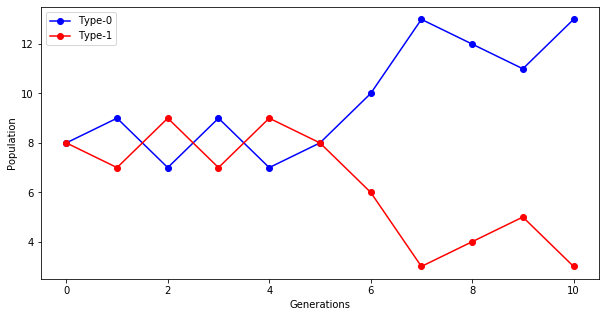

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

N = 16 # capacity of the universe
n1 = 8 # number of type 1
G = 10 # number of generations
cts, distri, u=wright_fisher(n1,N,G)
plt.plot(np.arange(G+1),cts[0],'b-o',label='Type-0')
plt.plot(np.arange(G+1),cts[1],'r-o',label='Type-1')
plt.xlabel('Generations')
plt.ylabel('Population')
plt.legend()

**Now, let's check the individuals in the last generation are the descedants of which individual at zeroth generation**

Text(0, 0.5, 'count')

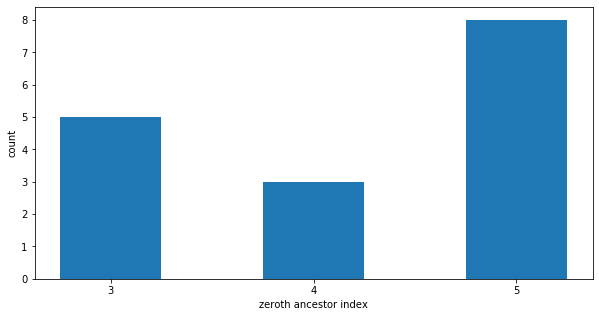

In [32]:
plt.bar(distri.keys(),distri.values(),0.5)
plt.xticks(list(distri.keys()),list(distri.keys()))
plt.xlabel('zeroth ancestor index')
plt.ylabel('count')

**Now, let's try a larger universe and more generations with the type-1 occupying half of the space still**

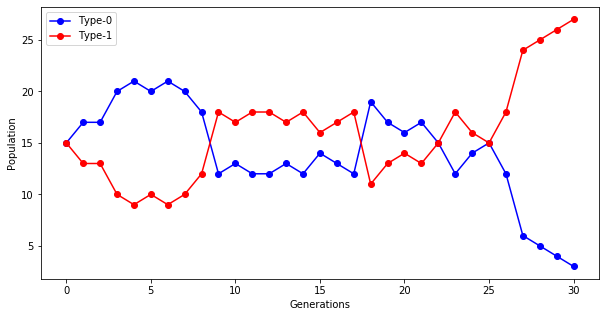

In [44]:
N = 30 # capacity of the universe
n1 = 15 # number of type 1
G = 30 # number of generations
cts, distri, u=wright_fisher(n1,N,G)
plt.plot(np.arange(G+1),cts[0],'b-o',label='Type-0')
plt.plot(np.arange(G+1),cts[1],'r-o',label='Type-1')
plt.xlabel('Generations')
plt.ylabel('Population')
plt.legend()

Text(0, 0.5, 'count')

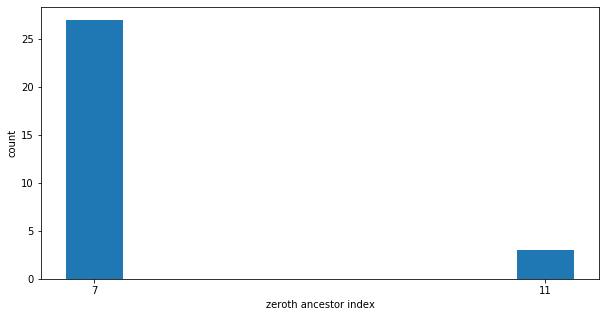

In [45]:
plt.bar(distri.keys(),distri.values(),0.5)
plt.xticks(list(distri.keys()),list(distri.keys()))
plt.xlabel('zeroth ancestor index')
plt.ylabel('count')

**If we further increase the generation numbers, will all the members are from the single ancestor?**

Text(0, 0.5, 'count')

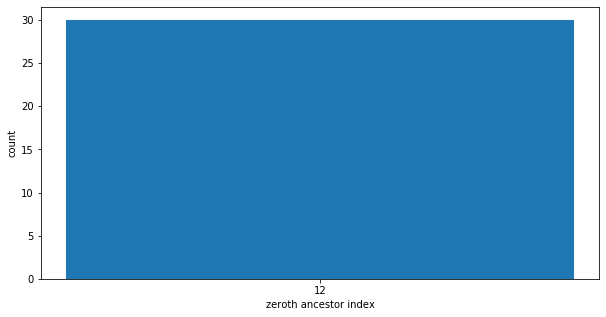

In [41]:
N = 30 # capacity of the universe
n1 = 15 # number of type 1
G = 66 # number of generations
cts, distri, u=wright_fisher(n1,N,G)
plt.bar(distri.keys(),distri.values(),0.2)
plt.xticks(list(distri.keys()),list(distri.keys()))
plt.xlabel('zeroth ancestor index')
plt.ylabel('count')

**Yes, all the individuals are from `#12` ancestor as shown above**

**Finally, let's try to implement Moran model with selection**

In [48]:
def moran_selection(ntyp1, N, Tstep, phi):
    # Because Moran model is a slow version of Wright-Fisher, we use 
    # number of time steps rather than the number of generations
    # if phi is >1, the type-1 is favored, otherwise, it is oppressed
    universe = np.zeros(N,dtype=int)
    init= choice(N,size=ntyp1).tolist()
    universe[init]=1
    
    evlvTree = prepAncestor(N)
    count = {0:[N-ntyp1],1:[ntyp1]} # number of different type individuals at each generation
    for i in range(Tstep):
        p1 = phi*count[1][-1]/(phi*count[1][-1]+(N-count[1][-1]))
        p0 = 1-p1
        event = choice([1,0],p=[p1,p0])
        
        if event==1:
            parent=choice(np.where(universe==1)[0])
            child = choice(N)
            universe[child]=universe[parent]

        else:
            parent=choice(np.where(universe==0)[0])
            child = choice(N)
            universe[child]=universe[parent]
            
        temp = Counter(universe.tolist())
        count[0].append(temp[0])
        count[1].append(temp[1])
        
        curr = node(child)
        curr.prev = evlvTree[parent]
        evlvTree[child] = curr # update the front of the tree
    
    ancesDistri = defaultdict(int)
    for i, leaf in enumerate(evlvTree):
        firstAnces = -1
        while leaf is not None:
            firstAnces = leaf.val
            leaf = leaf.prev
        ancesDistri[firstAnces]+=1
    
    return count, ancesDistri, universe

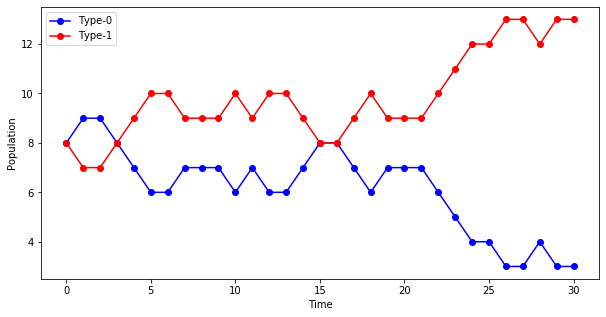

In [55]:
N = 16 # capacity of the universe
n1 = 8 # number of type 1
T = 30 # number of generations
fitness = 1.5 #phi
cts, distri, u=moran_selection(n1,N,T,fitness)
plt.plot(np.arange(G+1),cts[0],'b-o',label='Type-0')
plt.plot(np.arange(G+1),cts[1],'r-o',label='Type-1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

Text(0, 0.5, 'count')

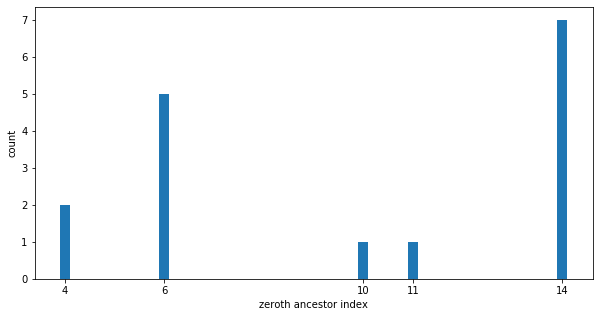

In [56]:
plt.bar(distri.keys(),distri.values(),0.2)
plt.xticks(list(distri.keys()),list(distri.keys()))
plt.xlabel('zeroth ancestor index')
plt.ylabel('count')

**Let's verify the last theorem listed in the notes**

In [65]:
rep = 10000
simlst = []
N = 16 # capacity of the universe
n1 = 8 # number of type 1
T = 90 # number of generations
fitness = 1.5 #phi
for i in range(rep):
    cts,_,_=moran_selection(n1,N,T,fitness)
    if cts[0][-1]==N:
        simlst.append(0)
    elif cts[1][-1]==N:
        simlst.append(1)
print("P(Type-1 wins after some time) is {}".format(sum(simlst)/rep))
print("The analytical probability is {}".format((1-1/fitness)/(1-fitness**(-N))))

P(Type-1 wins after some time) is 0.3719
The analytical probability is 0.3338415867314966


**The both agrees, somehow...**